In [1]:
import numpy as np
import math, copy
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 18}
matplotlib.rc('font', **font)

# Dataset

In [2]:
x = np.array([15.0,3.4,4.1,12.8,13.4,18.1,8.4,4.4,1.3,5.3,20.3,10.9,19.1,1.9,0.0])
y = np.array([18.4,3.3,10.6,5.5,7.4,8.5,7.9,5.7,0.9,7.8,14.4,11.2,15.1,2.0,1.8])

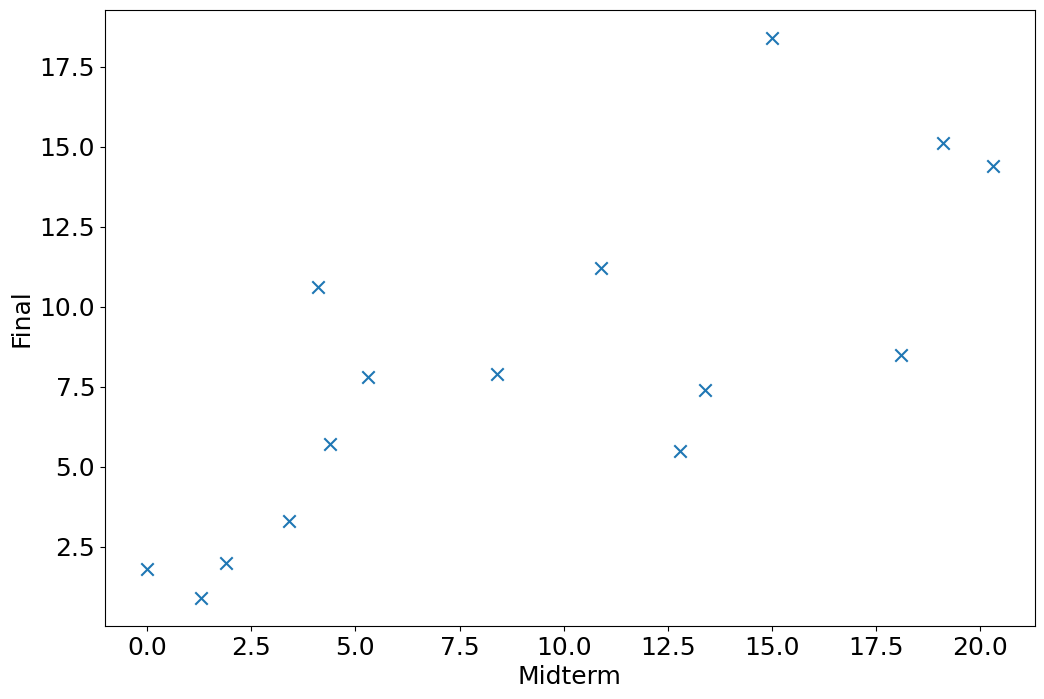

In [3]:
# Plot dataset
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x, y, marker='x', s=80)
ax.set_xlabel('Midterm')
ax.set_ylabel('Final')
plt.show()
plt.close('all')

# Linear Regression Model

In [4]:
# Linear Regression Model
def f_linear(x, w, b):
    m = x.shape[0]  # number of examples
    y_hats = np.zeros(m)
    for i in range(m):
        y_hats[i] = w*x[i] + b
    return y_hats

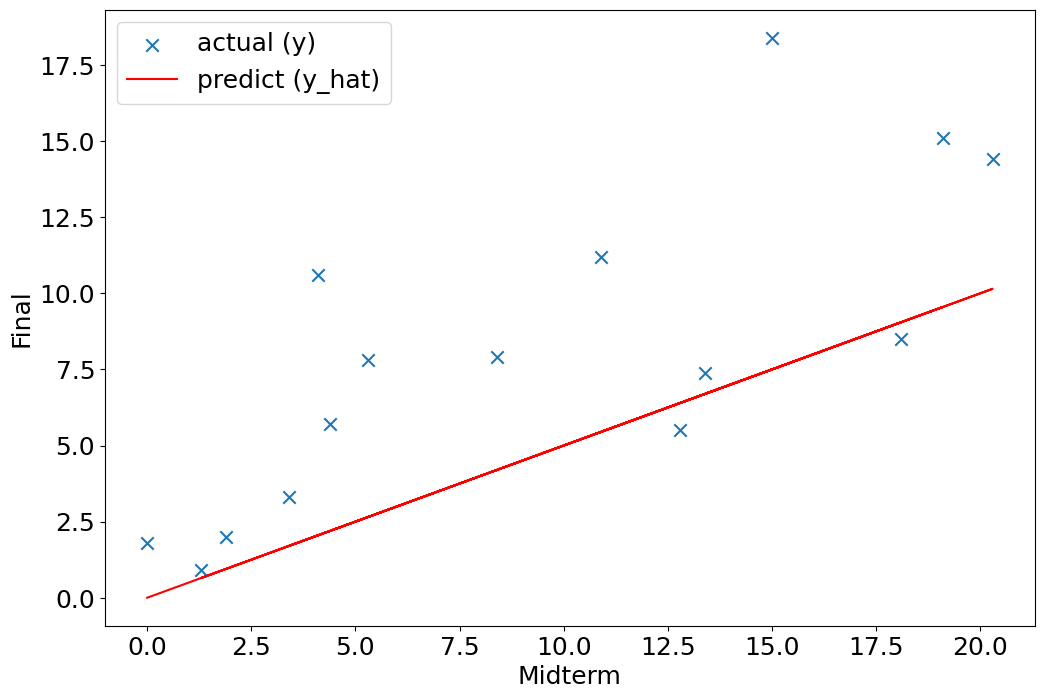

In [5]:
# Randomly select w and b
#ax+b
w = 0.5 #a
b = 0

# TODO: Make prediction
y_hats = w*x+b # YOUR CODE HERE

# Plot
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x, y, marker='x', s=80, label='actual (y)')
plt.plot(x, y_hats, c='r', label='predict (y_hat)')
ax.set_xlabel('Midterm')
ax.set_ylabel('Final')
plt.legend()
plt.show()
plt.close('all')

# Loss Function

In [7]:
def compute_loss(x, y, w, b): 
    """
    Computes the loss function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_loss (float): The loss of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 

    # prediction
    y_hats = f_linear(x, w, b)
    
    loss_sum = 0
    for i in range(m): 
        # TODO: add code to calculate the MSE loss for each example
        #       and then accumulate the loss in the `loss_sum`.
        loss_sum += y_hats[i]-y[i] # YOUR CODE HERE y=ค่าจริง (จุดในกราฟ),y_hats คือค่าที่หาจาก linear regresstion ax+b
    total_loss = (1 / (2 * m)) * loss_sum

    return total_loss

In [ ]:
# Compute cost
loss = compute_loss(x, y, w, b)
print(f"{loss=}")

# Gradient Descent

In [8]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters   (= แกน a,b )
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w =slop a
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b   = slop b  
     """

    # Number of training examples
    m = x.shape[0]

    # prediction
    y_hats = f_linear(x, w, b)

    # gradients
    dj_dw = 0 
    dj_db = 0

    for i in range(m):
        # TODO: add code to compute the gradient for linear regression
        # Hint: see the slide for the equation
        dj_dw_i = y_hats[i]-x[i]*y[i]*x[i] # YOUR CODE HERE
        dj_db_i = y_hats[i]-x[i]*y[i] # YOUR CODE HERE

        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db #reture เป็นค่า slope ของ a กับ  b 

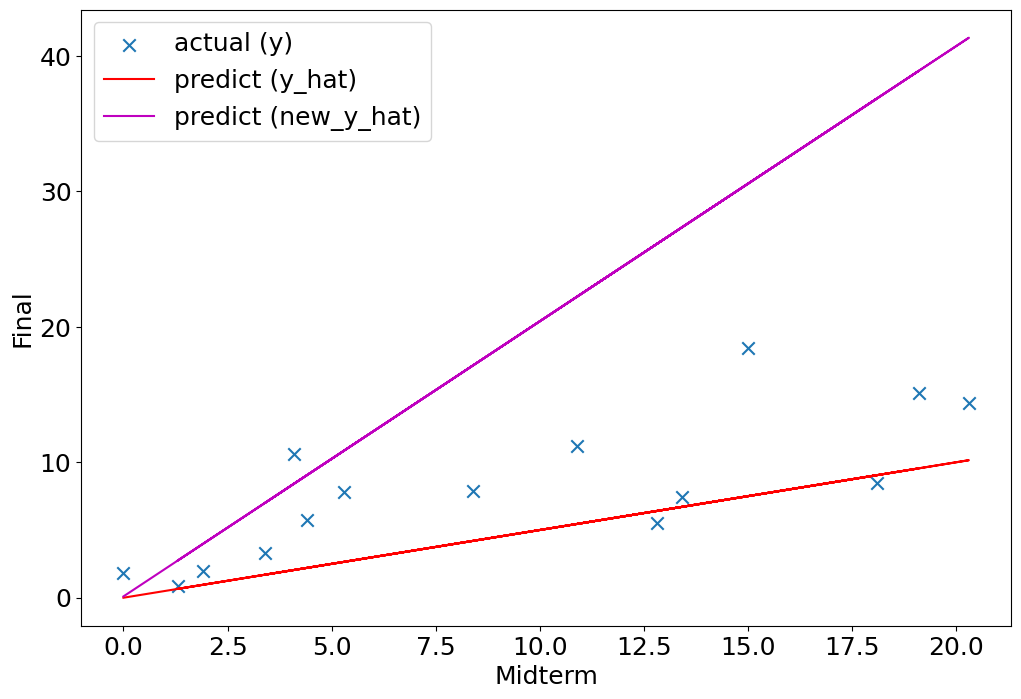

In [9]:
# Initial w and b
#ค่าเดา ๆ
w = 0.5 
b = 0

# Calculate the gradient
dj_dw, dj_db = compute_gradient(x, y, w, b)

# Update parameters with gradient descent
alpha = 1e-3 
# TODO: add code to update w and b using gradient descent
new_w = w-alpha*dj_dw # YOUR CODE HERE
new_b = b-alpha*dj_db # YOUR CODE HERE

# Predictions
new_y_hats = f_linear(x, new_w, new_b)

# Plot
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x, y, marker='x', s=80, label='actual (y)')
plt.plot(x, y_hats, c='r', label='predict (y_hat)')
plt.plot(x, new_y_hats, c='m', label='predict (new_y_hat)')
ax.set_xlabel('Midterm')
ax.set_ylabel('Final')
plt.legend()
plt.show()
plt.close('all')

In [12]:
def update_one_step(x, y, w, b, alpha):
    # Calculate the gradient
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # Update parameters with gradient descent
    # TODO: add code to update w and b using gradient descent
    new_w = w-alpha*dj_dw # YOUR CODE HERE
    new_b = b-alpha*dj_db # YOUR CODE HERE

    return new_w, new_b, dj_dw, dj_db

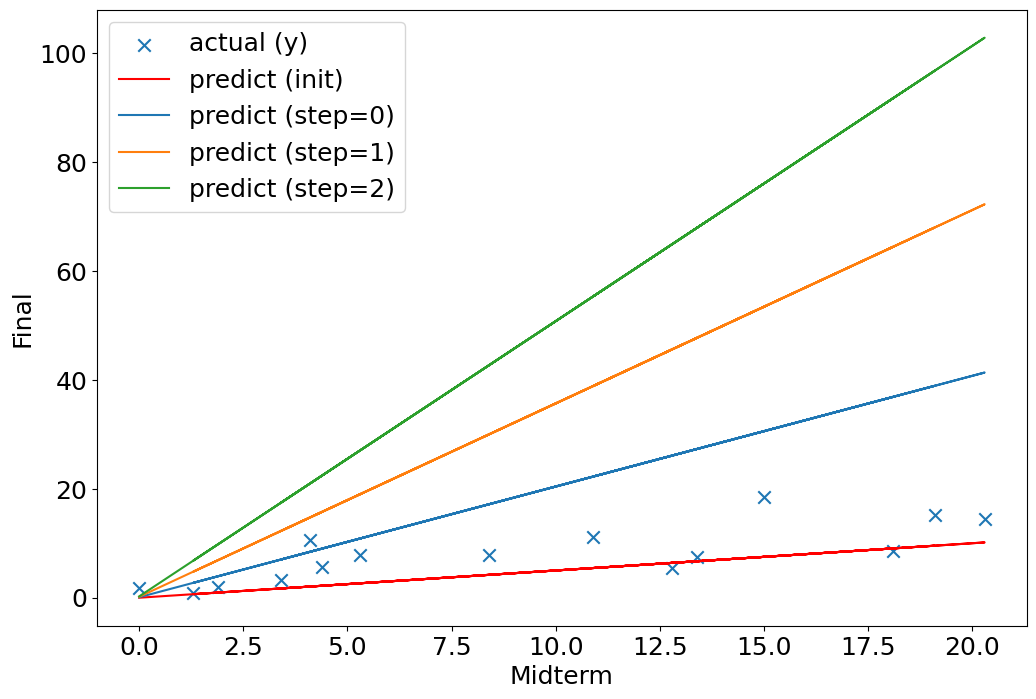

In [13]:
# Initial w and b
w = 0.5
b = 0

# Visualize improving the model via gradient descent step-by-step
alpha = 1e-3  # learning rate
n_steps = 3   # number of gradient descent updates
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x, y, marker='x', s=80, label='actual (y)')
plt.plot(x, f_linear(x, w, b), c='r', label='predict (init)')
for s in range(n_steps):
    # Update via gradient descent
    w, b, dj_dw, dj_db = update_one_step(x, y, w, b, alpha)
    # Linear line of the current model
    plt.plot(x, f_linear(x, w, b), label=f'predict (step={s})')
ax.set_xlabel('Midterm')
ax.set_ylabel('Final')
plt.legend()
plt.show()
plt.close('all')

In [14]:
def gradient_descent(x, y, w, b, alpha, n_steps): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):      Learning rate
      n_steps (int):      number of iterations to run gradient descent
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """
    
    # An array to store cost J and w's at each step (or iteration)
    J_history = []
    p_history = []
    
    for i in range(n_steps):
        # Calculate the gradient and update the parameters
        w, b, dj_dw, dj_db = update_one_step(x, y, w, b, alpha)

        # Save cost J at each iteration
        J_history.append(compute_loss(x, y, w, b))
        p_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(n_steps/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [15]:
# initialize parameters
w_init = 0.5
b_init = 0

# some gradient descent settings
n_steps = 100
alpha = 1e-3

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x ,y, w_init, b_init, alpha, n_steps)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.40e+00  dj_dw: -1.531e+03, dj_db: -9.503e+01   w:  2.031e+00, b: 9.50300e-02
Iteration   10: Cost 7.26e+01  dj_dw: -1.396e+03, dj_db:  4.084e+01   w:  1.659e+01, b: 2.86498e-01
Iteration   20: Cost 1.33e+02  dj_dw: -1.273e+03, dj_db:  1.634e+02   w:  2.986e+01, b:-8.06656e-01
Iteration   30: Cost 1.88e+02  dj_dw: -1.162e+03, dj_db:  2.741e+02   w:  4.197e+01, b:-3.05894e+00
Iteration   40: Cost 2.37e+02  dj_dw: -1.062e+03, dj_db:  3.739e+02   w:  5.303e+01, b:-6.35712e+00
Iteration   50: Cost 2.82e+02  dj_dw: -9.724e+02, dj_db:  4.640e+02   w:  6.315e+01, b:-1.05990e+01
Iteration   60: Cost 3.22e+02  dj_dw: -8.911e+02, dj_db:  5.452e+02   w:  7.242e+01, b:-1.56925e+01
Iteration   70: Cost 3.59e+02  dj_dw: -8.178e+02, dj_db:  6.186e+02   w:  8.093e+01, b:-2.15543e+01
Iteration   80: Cost 3.91e+02  dj_dw: -7.516e+02, dj_db:  6.847e+02   w:  8.873e+01, b:-2.81094e+01
Iteration   90: Cost 4.21e+02  dj_dw: -6.919e+02, dj_db:  7.444e+02   w:  9.592e+01, b:-3.52901e+01


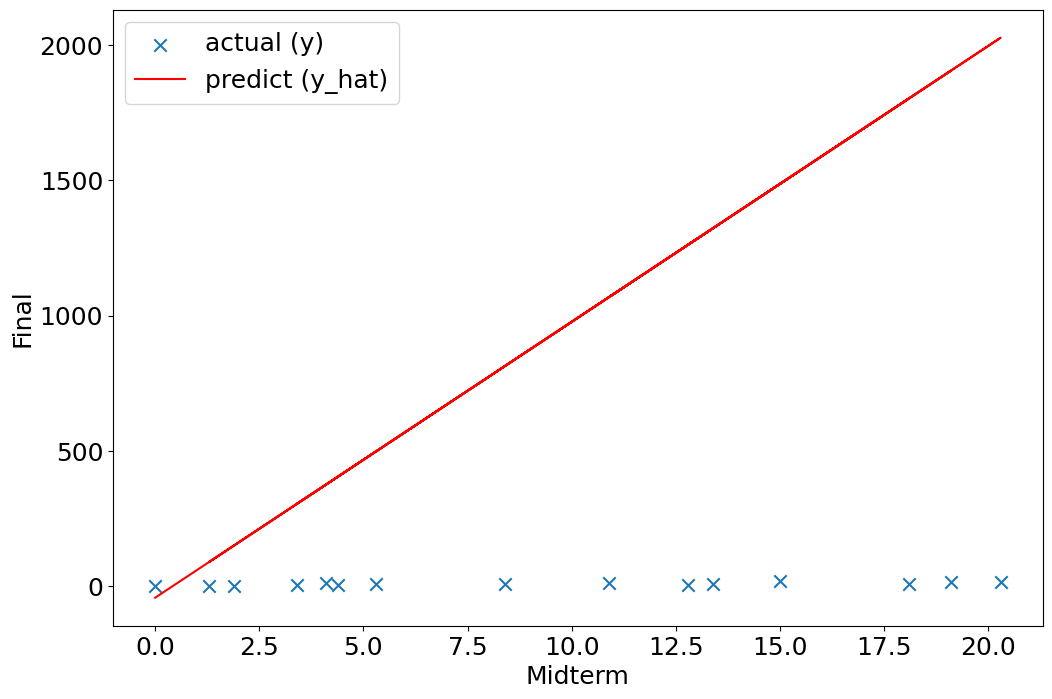

In [16]:
# Final model prediction
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x, y, marker='x', s=80, label='actual (y)')
plt.plot(x, f_linear(x, w_final, b_final), c='r', label='predict (y_hat)')
ax.set_xlabel('Midterm')
ax.set_ylabel('Final')
plt.legend()
plt.show()
plt.close('all')

# Test the final model

In [18]:
# TODO: Make prediction using new midterm score
new_x = x# YOUR CODE HERE
y_hat = f_linear(new_x, w_final, b_final) # YOUR CODE HERE ax+b new_x = a
print(f'Predicted final exam score: {y_hat}')

Predicted final exam score: [1486.23428926  304.21654971  375.54520641 1262.05851107 1323.19735966
 1802.11834034  813.70695469  406.11463071   90.23057962  497.8229036
 2026.29411853 1068.45215718 1904.01642134  151.36942822  -42.23692567]


# Play Around

*   Vary the number of steps or iterations (`n_steps`)
*   Vary `alpha` to make the learning process divergence
*   Vary the initial values of `w` and `b`

